In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Reviews.csv')
df = df.head(500)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [5]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
example = df['Text'][200]
print(example)

Even with small containers, they don't fill them up.  These little tins are less than half filled and at the price charged it seems a rip-off. Is there some exotic ingredient as costly as gold contained in those tiny squares?  Or how about the cereal ploy, they were filled at the factory but settled in transport.<br />Can manufacturers be honest in their dealings?


In [7]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example, return_tensors= 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'Negative' : scores[0],
        'Neutral' : scores[1],
        'Positive' : scores[2]
        }
    return  scores_dict


In [8]:
from tqdm.notebook import tqdm



In [9]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
         text = row['Text']
         myid = row['Id']
         res[myid] = polarity_scores_roberta(text)
        
    except RuntimeError:
         print(f'Broke for id {myid}, because the size of the text is too big for the model to process ')                           
    
  
    

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83, because the size of the text is too big for the model to process 
Broke for id 187, because the size of the text is too big for the model to process 


In [10]:
res

{1: {'Negative': 0.009624226, 'Neutral': 0.049980387, 'Positive': 0.94039536},
 2: {'Negative': 0.5089861, 'Neutral': 0.4524135, 'Positive': 0.038600333},
 3: {'Negative': 0.0032289, 'Neutral': 0.09806742, 'Positive': 0.8987037},
 4: {'Negative': 0.0022951262, 'Neutral': 0.09021916, 'Positive': 0.90748566},
 5: {'Negative': 0.0016347291, 'Neutral': 0.01030247, 'Positive': 0.98806286},
 6: {'Negative': 0.006129596, 'Neutral': 0.021795876, 'Positive': 0.97207457},
 7: {'Negative': 0.0013047539,
  'Neutral': 0.0077737933,
  'Positive': 0.99092144},
 8: {'Negative': 0.002029358, 'Neutral': 0.005685207, 'Positive': 0.9922854},
 9: {'Negative': 0.0038735832, 'Neutral': 0.094156355, 'Positive': 0.90197},
 10: {'Negative': 0.0031034616, 'Neutral': 0.05591223, 'Positive': 0.9409843},
 11: {'Negative': 0.019134095, 'Neutral': 0.07104441, 'Positive': 0.9098215},
 12: {'Negative': 0.37264335, 'Neutral': 0.5196989, 'Positive': 0.107657716},
 13: {'Negative': 0.46612442, 'Neutral': 0.41525936, 'Posi

In [11]:
new_df = pd.DataFrame(res).T
new_df = new_df.reset_index().rename(columns={'index': 'Id'})
new_df = new_df.merge(df, how = 'left')

In [12]:
new_df.head()

,Id,Negative,Neutral,Positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
new_df.describe()

,Id,Negative,Neutral,Positive,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02
mean,250.963855,0.133768,0.126815,0.739417,0.921687,1.246988,4.313253,1.294679e+09
std,144.548345,0.263605,0.152774,0.337778,1.950053,2.416668,1.204563,5.077717e+07
min,1.000000,0.000937,0.004811,0.002235,0.000000,0.000000,1.000000,1.107821e+09
25%,126.250000,0.002372,0.017916,0.552862,0.000000,0.000000,4.000000,1.267531e+09
50%,251.500000,0.007104,0.052821,0.928070,0.000000,0.000000,5.000000,1.312934e+09
75%,375.750000,0.095470,0.183250,0.980266,1.000000,2.000000,5.000000,1.334621e+09
max,500.000000,0.978985,0.778621,0.993592,19.000000,19.000000,5.000000,1.351210e+09


In [14]:
total_reviews = len(new_df)

In [15]:
number_of_positive = ((new_df['Positive'] > new_df['Negative']) & (new_df['Positive'] > new_df['Neutral'])).sum()
number_of_neutral = ((new_df['Neutral'] > new_df['Positive']) & (new_df['Neutral'] > new_df['Negative'])).sum()
number_of_negative = ((new_df['Negative'] > new_df['Positive']) & (new_df['Negative'] > new_df['Neutral'])).sum()

In [16]:
percentage_of_positive = round((number_of_positive/total_reviews)*100)
percentage_of_neutral = round((number_of_neutral/total_reviews)*100)
percentage_of_negative = round((number_of_negative/total_reviews)*100)

In [17]:
print(str(percentage_of_positive) + "%" + " " + "gave a positive review on the product")
print(str(percentage_of_neutral) + "%" + " " + "gave a neutal review on the product")
print(str(percentage_of_negative) + "%" + " " + "gave a negative review on the product")

80% gave a positive review on the product
7% gave a neutal review on the product
13% gave a negative review on the product


In [18]:
new_df

,Id,Negative,Neutral,Positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,0.001906,0.009862,0.988232,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
494,497,0.004415,0.034215,0.961369,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
495,498,0.006427,0.074537,0.919036,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
496,499,0.865614,0.119366,0.015020,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [55]:
conditions = [
    (new_df['Positive'] > new_df['Negative']) & (new_df['Positive'] > new_df['Neutral']),
    (new_df['Neutral'] > new_df['Positive']) & (new_df['Neutral'] > new_df['Negative']),
    (new_df['Negative'] > new_df['Positive']) & (new_df['Negative'] > new_df['Neutral'])
]

ratings = ['Positive', 'Neutral', 'Negative']

new_df['Rating'] = np.select(conditions, ratings)

print(new_df)


      Id  Negative   Neutral  Positive   ProductId          UserId  \
0      1  0.009624  0.049980  0.940395  B001E4KFG0  A3SGXH7AUHU8GW   
1      2  0.508986  0.452413  0.038600  B00813GRG4  A1D87F6ZCVE5NK   
2      3  0.003229  0.098067  0.898704  B000LQOCH0   ABXLMWJIXXAIN   
3      4  0.002295  0.090219  0.907486  B000UA0QIQ  A395BORC6FGVXV   
4      5  0.001635  0.010302  0.988063  B006K2ZZ7K  A1UQRSCLF8GW1T   
..   ...       ...       ...       ...         ...             ...   
493  496  0.001906  0.009862  0.988232  B000G6RYNE   APGAA43E3WPN7   
494  497  0.004415  0.034215  0.961369  B000G6RYNE    ABR7HU5H1KNE   
495  498  0.006427  0.074537  0.919036  B000G6RYNE   AJQD2WWJYOYFQ   
496  499  0.865614  0.119366  0.015020  B000G6RYNE  A16YH487W9ZYO0   
497  500  0.002440  0.011327  0.986233  B000G6RYNE   A83YQC1XOU4CS   

                         ProfileName  HelpfulnessNumerator  \
0                         delmartian                     1   
1                             dll p

In [56]:
new_df.head()


,Id,Negative,Neutral,Positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Rating
0,1,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Positive
4,5,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


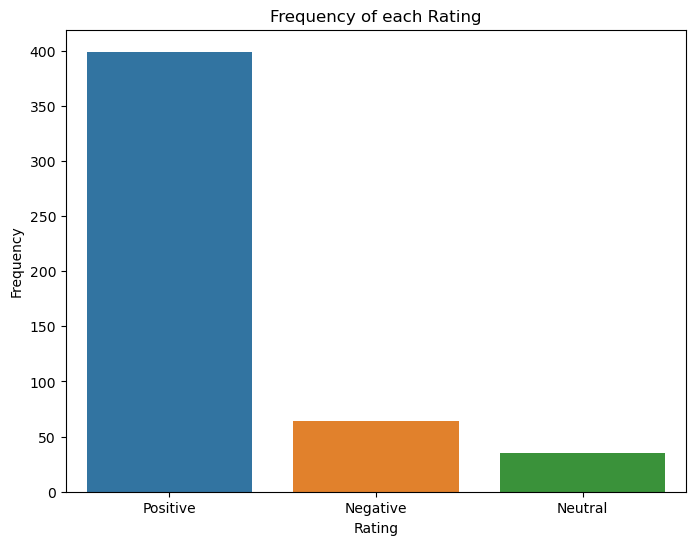

In [62]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=new_df)


plt.title('Frequency of each Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')



plt.show()
